In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
tf.set_random_seed(777)
np.random.seed(777)

In [ ]:
#ydata= xdata * w + b

In [7]:
w = tf.Variable(tf.random_normal([1]),name = 'weight') # <-초기값을 직접 줄 수도있음
b = tf.Variable(tf.random_normal([1]),name = 'bias')
#텐서보드에 그릴때 name이 있으면 좋음

In [8]:
x = tf.placeholder(tf.float32, shape = [None]) #<- None:갯수가 정해져있지 않음
y = tf.placeholder(tf.float32, shape = [None])
hf = x*w + b
cost = tf.reduce_mean(tf.square(hf - y)) # reduce_mean:함수가 합을 구하고 평균을 구해줌

In [10]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.1)
#learningrate(alpha): 학습률을 의미 여기서 지정해줌
train = opt.minimize(cost) #<- cost가 최소화 되도록 

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [12]:
for step in range(2001):
    _,cv,bv,wv = sess.run([train,cost,b,w], #train, cost,b,w 전부 실행됨=>_인 train은 무시,나머지는 실행됨
             feed_dict={x:[1,2,3],y:[2,3,4]})#<- node를 실행, feed_dict를 해줘야함
    #1입력되며 2가 만들어지고 2가 입력되면 3이 만들어지는 선형모델
    if step % 100 == 0:
        print(step, cv, bv, wv)
    

0 9.74718 [-0.6593585] [1.8845959]
100 0.003416134 [0.84939486] [1.0662514]
200 2.6303029e-05 [0.9867848] [1.0058134]
300 2.025469e-07 [0.9988404] [1.0005101]
400 1.5514084e-09 [0.9998983] [1.0000448]
500 1.1790273e-11 [0.99999106] [1.0000039]
600 3.0790184e-13 [0.99999845] [1.0000007]
700 3.0790184e-13 [0.99999845] [1.0000007]
800 3.0790184e-13 [0.99999845] [1.0000007]
900 3.0790184e-13 [0.99999845] [1.0000007]
1000 3.0790184e-13 [0.99999845] [1.0000007]
1100 3.0790184e-13 [0.99999845] [1.0000007]
1200 3.0790184e-13 [0.99999845] [1.0000007]
1300 3.0790184e-13 [0.99999845] [1.0000007]
1400 3.0790184e-13 [0.99999845] [1.0000007]
1500 3.0790184e-13 [0.99999845] [1.0000007]
1600 3.0790184e-13 [0.99999845] [1.0000007]
1700 3.0790184e-13 [0.99999845] [1.0000007]
1800 3.0790184e-13 [0.99999845] [1.0000007]
1900 3.0790184e-13 [0.99999845] [1.0000007]
2000 3.0790184e-13 [0.99999845] [1.0000007]


In [13]:
print(sess.run(hf,feed_dict={x:10}))

ValueError: Cannot feed value of shape () for Tensor 'Placeholder_4:0', which has shape '(?,)'

In [14]:
w = tf.Variable([100.],tf.float32)
b = tf.Variable([-10.],tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [15]:
hf=x*w+b
cost=tf.reduce_sum(tf.square(hf-y))

In [18]:
opt=tf.train.GradientDescentOptimizer(0.01)
train=opt.minimize(cost)

In [19]:
xtrain=[1,2,3,4,5]
ytrain=[0,-1,-2,-3,-4]

In [20]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [21]:
for i in range(1001):
    sess.run(train, {x:xtrain,y:ytrain})  #<- feed_dict써 주는게 보기엔 좋음

In [22]:
wv,bv,costv = sess.run([w,b,cost], feed_dict={x:xtrain,y:ytrain})
print("weight: %s bias: %s cost: %s" % (wv,bv,costv))

weight: [-0.9999995] bias: [0.99999833] cost: 2.5579538e-12


In [ ]:
"""
연습문제:
x=[1,3,5]
y=[10,28,40]
b는 무시
"""

In [51]:
w=tf.placeholder(tf.float32)
hf=x*w
loss=tf.reduce_mean(tf.square(hf - y))

In [ ]:
#선형회귀모델 작성
#시각화:  weight값이 -3 ~ 5까지 0.1씩 증가시켜가면서 cost값의 변화를 출력

In [28]:
import matplotlib.pyplot as plt

In [42]:
wHistory=[]
cHistory=[]

In [52]:
for i in range(-30,50):
    currW=i*0.1
    lossv=sess.run(loss, feed_dict={w:currW})
    wHistory.append(currW)
    cHistory.append(lossv)

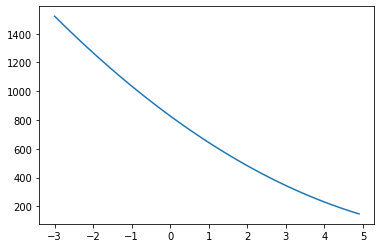

In [53]:
x=[1,3,5]
y=[10,28,40]
plt.plot(wHistory, cHistory)
plt.show()

In [ ]:
"""
경사하강법에서 update 구문 작성
"""

In [59]:
xdata=[1,2,3]
ydata=[1,2,3]

In [54]:
w=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [57]:
lr = 0.1
hf = x*w
cost = tf.reduce_mean(tf.square(hf-y))
gradient = tf.reduce_mean((w*x - y)*x) 
descent = w - lr*gradient
update = w.assign(descent) #<- tf에서는 =이 없기때문에 assign을 활용해야함

In [61]:
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update,feed_dict={x:xdata,y:ydata}) #<- update만 실행하면 저절로 모델이 다 만들어짐
    print(step,
          sess.run(cost,feed_dict={x:xdata,y:ydata}),
          sess.run(w))

0 0.45876774 [0.68645996]
1 0.13049395 [0.83277863]
2 0.03711824 [0.9108153]
3 0.010558069 [0.95243484]
4 0.0030031817 [0.9746319]
5 0.0008542379 [0.98647034]
6 0.00024298509 [0.99278414]
7 6.911707e-05 [0.9961515]
8 1.9660401e-05 [0.99794745]
9 5.592112e-06 [0.9989053]
10 1.5905849e-06 [0.9994162]
11 4.5245284e-07 [0.9996886]
12 1.2872498e-07 [0.99983394]
13 3.65893e-08 [0.9999114]
14 1.0431531e-08 [0.99995273]
15 2.9635185e-09 [0.9999748]
16 8.500223e-10 [0.9999865]
17 2.3874236e-10 [0.99999285]
18 6.7908935e-11 [0.9999962]
19 1.9653612e-11 [0.999998]
20 5.6322356e-12 [0.9999989]


In [ ]:
"""
multi variable linear regression
"""

In [63]:
x1data=[73,93,90,95,72] # <-5명의 모고점수
x2data=[80,88,92,98,66]
x3data=[75,92,90,100,70]
ydata=[152,185,180,195,140]

In [66]:
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [67]:
w1=tf.Variable(tf.random_normal([1]))
w2=tf.Variable(tf.random_normal([1]))
w3=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf = x1*w1 + x2*w2 + x3*w3 + b


In [68]:
cost = tf.reduce_mean(tf.square(hf -y))

In [69]:
opt=tf.train.GradientDescentOptimizer(1e-5) # 1e-5: 10^-5와 같음
train=opt.minimize(cost)

In [70]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [72]:
for step in range(2001):
    cv,hfv,_=sess.run([cost,hf,train],feed_dict={x1:x1data, #<- costV,hfV나오고 train은 무시
                                        x2:x2data,
                                        x3:x3data,
                                       y:ydata})
    if step%10==0:
        print(step,"cost:",cv,
             "\nprediction:",hfv)

0 cost: 1.851738 
prediction: [151.03447 184.17947 182.2744  193.73688 140.94064]
10 cost: 1.8509737 
prediction: [151.03516 184.17874 182.27438 193.73766 140.93976]
20 cost: 1.8501806 
prediction: [151.03584 184.17804 182.27435 193.73843 140.93886]
30 cost: 1.8494079 
prediction: [151.03653 184.17734 182.27434 193.73921 140.93797]
40 cost: 1.8486229 
prediction: [151.0372  184.17664 182.2743  193.73999 140.93707]
50 cost: 1.8478581 
prediction: [151.03787 184.17593 182.27429 193.74077 140.93619]
60 cost: 1.847086 
prediction: [151.03854 184.17523 182.27426 193.74155 140.93532]
70 cost: 1.8463259 
prediction: [151.03922 184.17455 182.27425 193.74231 140.93443]
80 cost: 1.845547 
prediction: [151.03987 184.17383 182.2742  193.74309 140.93355]
90 cost: 1.8447918 
prediction: [151.04054 184.17313 182.27419 193.74387 140.93268]
100 cost: 1.8440211 
prediction: [151.04121 184.17245 182.27415 193.74463 140.93181]
110 cost: 1.8432547 
prediction: [151.0419  184.17177 182.27414 193.74542 140.9

In [ ]:
"""
행렬곱셈으로 바꾸기
"""

In [5]:
xdata=[[73,93,90,95,72], #<- 5명의 모고점수(행렬로)
        [80,88,92,98,66],
        [75,92,90,100,70]] #<- 3x5
ydata=[[152],[185],[180],[195],[140]]

In [6]:
xdata=np.array(xdata).T #<- 그냥은 리스트라 array로 바꾸고 Transpose해줘야함
ydata

[[152], [185], [180], [195], [140]]

In [ ]:
*      hf = x * w + b
#shape=>(5,3) *(3,1) + (1) :여기서 5는 데이터의 수인데 항상 변하는 것이 일반적 따라서 (None,3)

In [2]:
x = tf.placeholder(tf.float32,shape=[None,3])
y = tf.placeholder(tf.float32,shape=[None,1])
w = tf.Variable(tf.random_normal([3,1])) #<- 다변수기 떄문에 행 수 조심
b = tf.Variable(tf.random_normal([1]))
hf = tf.matmul(x,w) + b

In [7]:
cost = tf.reduce_mean(tf.square(hf-y))

In [9]:
opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [10]:
#완성:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [11]:
for step in range(2001):
    cv,hfv,_=sess.run([cost,hf,train],feed_dict={x:xdata, #<- costV,hfV나오고 train은 무시
                                       y:ydata})
    if step%10==0:
        print(step,"cost:",cv,
             "\nprediction:",hfv)

0 cost: 124733.625 
prediction: [[-164.59538]
 [-192.00714]
 [-195.27856]
 [-203.11661]
 [-146.30443]]
10 cost: 8.533683 
prediction: [[148.06242]
 [182.34894]
 [177.70392]
 [198.69994]
 [138.91637]]
20 cost: 7.361543 
prediction: [[149.02023]
 [183.49406]
 [178.84616]
 [199.92798]
 [139.78894]]
30 cost: 7.3570657 
prediction: [[149.0243 ]
 [183.49725]
 [178.85065]
 [199.9303 ]
 [139.79147]]
40 cost: 7.3526506 
prediction: [[149.02545]
 [183.49695]
 [178.85162]
 [199.92888]
 [139.79135]]
50 cost: 7.348155 
prediction: [[149.02663]
 [183.49666]
 [178.85262]
 [199.92744]
 [139.79121]]
60 cost: 7.343722 
prediction: [[149.02777]
 [183.49635]
 [178.85364]
 [199.92603]
 [139.7911 ]]
70 cost: 7.339292 
prediction: [[149.02893]
 [183.49605]
 [178.85461]
 [199.9246 ]
 [139.791  ]]
80 cost: 7.3348436 
prediction: [[149.03006]
 [183.49574]
 [178.85559]
 [199.92316]
 [139.79086]]
90 cost: 7.3304358 
prediction: [[149.03119]
 [183.49542]
 [178.85657]
 [199.92172]
 [139.79073]]
100 cost: 7.3260026 

In [ ]:
"""
90,90,90일 떄 예상점수
"""

In [65]:
score=np.loadtxt("c:/Users/김경한/jupyter notebook data/data-01-test-score.csv",
                  delimiter=',', dtype=np.float32)
score[0:3]

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.]], dtype=float32)

In [70]:
x_data=score[:,0:-1]
y_data=score[:,[-1]]

print(x_data, "\n x_data shape:",x_data.shape)
print(y_data, "\n y_data shape:",y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
 x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
 y_data shape: (25, 1)


In [71]:
x = tf.placeholder(tf.float32,shape=[None,3])
y = tf.placeholder(tf.float32,shape=[None,1])

w = tf.Variable(tf.random_normal([3,1]), name='weight') #<- 다변수기 떄문에 행 수 조심
b = tf.Variable(tf.random_normal([1]),name='bias')

hf = tf.matmul(x,w) + b

cost = tf.reduce_mean(tf.square(hf-y))

opt = tf.train.GradientDescentOptimizer(1e-5)
train = opt.minimize(cost)

In [72]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hf, train], 
                                   feed_dict={x: x_data, y: y_data})
    if step % 10 == 0:
        print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)

0 Cost: 86200.45 
Prediction:
 [[-125.91472 ]
 [-144.40944 ]
 [-145.83633 ]
 [-157.67792 ]
 [-109.621254]
 [ -78.751625]
 [-118.66091 ]
 [ -88.93847 ]
 [-132.2186  ]
 [-119.65834 ]
 [-113.44415 ]
 [-108.52722 ]
 [-151.57355 ]
 [-127.24127 ]
 [-118.08732 ]
 [-146.15034 ]
 [-120.42643 ]
 [-143.05455 ]
 [-145.75485 ]
 [-131.07832 ]
 [-138.35002 ]
 [-134.96384 ]
 [-132.8252  ]
 [-129.1804  ]
 [-151.15695 ]]
10 Cost: 16.404997 
Prediction:
 [[148.22205 ]
 [185.0608  ]
 [178.80476 ]
 [195.88054 ]
 [141.64955 ]
 [106.49763 ]
 [145.99422 ]
 [107.267204]
 [175.6905  ]
 [165.53815 ]
 [141.5327  ]
 [142.87776 ]
 [183.82562 ]
 [151.57295 ]
 [147.78177 ]
 [188.1857  ]
 [145.10265 ]
 [174.56117 ]
 [174.00293 ]
 [155.03044 ]
 [171.99782 ]
 [174.12419 ]
 [163.06853 ]
 [147.21507 ]
 [190.30363 ]]
20 Cost: 12.256828 
Prediction:
 [[150.12434]
 [187.32994]
 [181.04947]
 [198.32518]
 [143.37587]
 [107.76833]
 [147.82893]
 [108.63458]
 [177.80714]
 [167.49709]
 [143.29523]
 [144.60802]
 [186.14442]
 [153.4

In [74]:
print("Your score will be ", sess.run(hf, 
                                      feed_dict={x: [[100,100, 100]]}))

print("Other scores will be ", sess.run(hf,
                                        feed_dict={x: [[90, 90, 90], [90, 100, 80]]}))

Your score will be  [[202.012]]
Other scores will be  [[181.69032]
 [174.36658]]


In [27]:
#logistic regression

In [28]:
xdata=[[1,2],
      [2,3],
      [3,1],
      [4,3],
      [5,3],
      [6,2]]  #<-[시간,출석일수]
ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]] #<- 0:불합격 1:합격

In [29]:
x = tf.placeholder(tf.float32,shape=[None,2])  #<-[데이터건수,변수갯수]
y = tf.placeholder(tf.float32,shape=[None,1])

In [30]:
w = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

In [31]:
hf = tf.sigmoid(tf.matmul(x,w)+b)

In [32]:
cost = -tf.reduce_mean(y*tf.log(hf) +
                       (1-y)*(tf.log(1-hf)))

In [33]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost) #<-minimize까지 한꺼번에

In [41]:
# 임계치:0.5라 할때 보다 크면 1, 보다 작으면 0
predicted=tf.cast(hf>0.5,dtype = tf.float32)  
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))

In [42]:
with tf.Session() as sess: #<-sess로 Session객체를 만듬/ with를 벗어나면 Session 사라짐
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv = sess.run([train,cost],feed_dict={x:xdata,y:ydata})
        # train은 버리고 costV만
        if step % 200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted],feed_dict={x:xdata,y:ydata})  
    print("예측값:",hv,"예측분류:",pv,"판단:",av)

0 0.6855156
200 0.4977672
400 0.46522555
600 0.4423581
800 0.42406583
1000 0.4082595
1200 0.3939968
1400 0.38081798
1600 0.3684815
1800 0.35685027
2000 0.34583977
2200 0.33539274
2400 0.32546613
2600 0.3160252
2800 0.30704007
3000 0.29848382
3200 0.29033166
3400 0.28256074
3600 0.27514914
3800 0.26807675
4000 0.2613242
4200 0.25487348
4400 0.24870759
4600 0.24281025
4800 0.23716664
5000 0.23176245
5200 0.22658439
5400 0.22161996
5600 0.21685748
5800 0.21228601
6000 0.20789512
6200 0.20367526
6400 0.19961731
6600 0.19571291
6800 0.19195406
7000 0.1883332
7200 0.18484335
7400 0.1814779
7600 0.17823072
7800 0.17509604
8000 0.17206824
8200 0.16914235
8400 0.16631345
8600 0.16357706
8800 0.1609288
9000 0.15836464
9200 0.15588082
9400 0.15347381
9600 0.15114006
9800 0.1488765
10000 0.14668001
10200 0.14454776
10400 0.14247702
10600 0.14046523
10800 0.13851008
11000 0.13660905
11200 0.13476014
11400 0.13296115
11600 0.13121016
11800 0.12950535
12000 0.12784494
12200 0.12622713
12400 0.1246504

ValueError: not enough values to unpack (expected 3, got 2)